Kth Nearest Neighbour (KNN Algorithm)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [2]:
df=pd.DataFrame(digits['data'],columns=digits['feature_names'])
df['target']=digits['target']
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
from sklearn.model_selection import train_test_split
X=df.drop(['target'],axis='columns')
Y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
model.predict(X_test)

array([0, 5, 5, 0, 2, 3, 6, 4, 0, 3, 4, 1, 6, 3, 3, 6, 2, 5, 4, 5, 2, 1,
       2, 7, 0, 4, 7, 0, 7, 4, 6, 2, 7, 4, 3, 0, 5, 5, 9, 7, 2, 1, 3, 5,
       2, 0, 4, 0, 3, 5, 1, 9, 8, 8, 4, 9, 4, 4, 1, 1, 1, 2, 5, 2, 8, 3,
       6, 8, 4, 6, 4, 8, 8, 7, 1, 1, 1, 1, 8, 8, 8, 8, 9, 6, 2, 8, 3, 5,
       5, 1, 6, 2, 8, 4, 4, 6, 9, 4, 4, 9, 8, 0, 2, 2, 0, 3, 7, 3, 9, 3,
       6, 3, 4, 0, 3, 5, 1, 2, 3, 1, 3, 9, 5, 9, 2, 5, 2, 7, 8, 8, 9, 9,
       3, 2, 8, 3, 8, 7, 8, 5, 4, 7, 6, 9, 9, 0, 3, 4, 9, 2, 7, 5, 2, 9,
       7, 2, 5, 7, 1, 3, 8, 6, 7, 9, 3, 1, 9, 3, 6, 7, 2, 4, 2, 4, 3, 3,
       0, 6, 3, 6, 4, 5, 5, 0, 2, 1, 5, 1, 3, 6, 0, 3, 7, 2, 6, 3, 5, 7,
       9, 1, 3, 8, 6, 9, 1, 5, 2, 8, 8, 5, 8, 8, 7, 0, 6, 9, 8, 2, 9, 9,
       0, 6, 9, 8, 5, 5, 3, 9, 7, 6, 6, 6, 4, 2, 7, 6, 0, 5, 1, 6, 1, 5,
       4, 2, 3, 5, 1, 1, 9, 0, 0, 5, 3, 3, 6, 7, 0, 7, 3, 6, 4, 7, 1, 5,
       1, 3, 8, 4, 1, 1, 7, 7, 4, 6, 6, 2, 5, 6, 8, 1, 2, 9, 0, 2, 2, 7,
       6, 5, 3, 4, 8, 0, 1, 7, 7, 0, 8, 2, 8, 7, 7,

In [6]:
model.score(X_test,Y_test)

0.9888888888888889

GridSearchCV

In [7]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(
    KNeighborsClassifier(),
    {
        'n_neighbors': range(3,20)
    },
    cv=10,
    return_train_score=False
)
clf.fit(X_train,Y_train)
Y_predicted=clf.predict(X_test)

In [8]:
clf.cv_results_

{'mean_fit_time': array([0.0027225 , 0.0024334 , 0.0023334 , 0.00266082, 0.00195687,
        0.00241091, 0.0020009 , 0.00231371, 0.00232341, 0.00200012,
        0.00190105, 0.00226994, 0.00218084, 0.00229895, 0.00180051,
        0.00234258, 0.00189335]),
 'std_fit_time': array([0.00065383, 0.00069782, 0.00047313, 0.00045919, 0.0006504 ,
        0.00050132, 0.0006337 , 0.00101285, 0.00049509, 0.00063226,
        0.00030031, 0.00062731, 0.00035428, 0.00078   , 0.00074826,
        0.00068916, 0.00066654]),
 'mean_score_time': array([0.00962653, 0.0083035 , 0.00900092, 0.00994554, 0.00805969,
        0.00889337, 0.00777943, 0.00949407, 0.00868156, 0.00896151,
        0.00887661, 0.00953481, 0.00901105, 0.00916135, 0.00872421,
        0.00943356, 0.00909386]),
 'std_score_time': array([0.00161739, 0.00137614, 0.00138911, 0.00155352, 0.00118643,
        0.00131674, 0.00101222, 0.00119374, 0.00206512, 0.0012251 ,
        0.00092884, 0.00177125, 0.00136518, 0.00096526, 0.00172376,
        0.00

In [9]:
clf.best_score_

0.9853778166278166

In [10]:
clf.best_params_

{'n_neighbors': 3}

Confusuion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_predicted,Y_test)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 32]], dtype=int64)

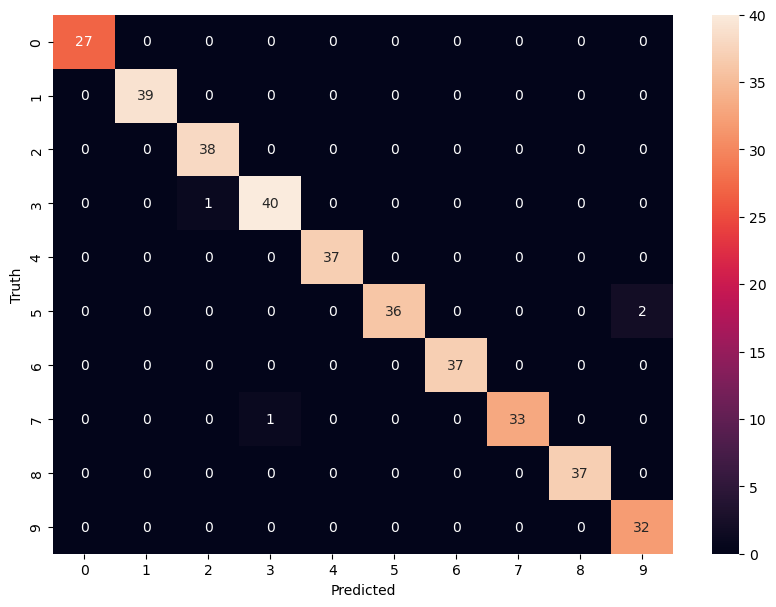

In [12]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

CLASSFICATION REPORT

In [13]:
from sklearn.metrics import classification_report

CR=classification_report(Y_test,Y_predicted)
print(CR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        39
           2       1.00      0.97      0.99        39
           3       0.98      0.98      0.98        41
           4       1.00      1.00      1.00        37
           5       0.95      1.00      0.97        36
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        33
           8       1.00      1.00      1.00        37
           9       1.00      0.94      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



Best Classification for K=3